<a href="https://colab.research.google.com/github/jrdn-sentosa/Group-13/blob/main/Group_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# U.S. Executions by Region

Coded by Jordan Sentosa

In [22]:
%%capture
!git clone https://github.com/jrdn-sentosa/Group-13
%cd /content/Group-13/

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [23]:
df = pd.read_csv('DPIC_Execution_dataset.csv')

df['Region'] = df['Region'].str.strip().str.title()
df['State'] = df['State'].str.strip().str.title()

df_filtered = df[df['State'] != 'Federal']
df_filtered = df_filtered[['State', 'Region']]

region_counts = df_filtered['Region'].value_counts()
state_counts = df_filtered['State'].value_counts()
region_counts_texas_removed = df_filtered[(df_filtered['State'] != 'Texas')]['Region'].value_counts()
state_counts_texas_removed = df_filtered[(df_filtered['State'] != 'Texas')]['State'].value_counts()
south_counts = df_filtered[df_filtered['Region'] == 'South']['State'].value_counts()
south_counts_texas_removed = df_filtered[(df_filtered['Region'] == 'South') & (df_filtered['State'] != 'Texas')]['State'].value_counts()
midwest_counts = df_filtered[df_filtered['Region'] == 'Midwest']['State'].value_counts()
west_counts = df_filtered[df_filtered['Region'] == 'West']['State'].value_counts()
northeast_counts = df_filtered[df_filtered['Region'] == 'Northeast']['State'].value_counts()

df.head(5)

,Execution Volunteer,Number of Victims,Juvenile,First Name,Last Name,Middle Name(s),Suffix,Race,Sex,Region,...,Number of Asian Male Victims,Number of Native American Male Victims,Number of Other Race Male Victims,Number of White Female Victims,Number of Black Female Victims,Number of Latino Female Victims,Number of Asian Female Victims,Number of American Indian or Alaska Native Female Victims,Number of Other Race Female Victims,Victim(s) Race(s)
0,yes,1,no,Gary,Gilmore,Mark,NaN,White,Male,West,...,0,0,0,0,0,0,0,0,0,White
1,no,1,no,John,Spenkelink,NaN,NaN,White,Male,South,...,0,0,0,0,0,0,0,0,0,White
2,yes,1,no,Jesse,Bishop,NaN,NaN,White,Male,West,...,0,0,0,0,0,0,0,0,0,White
3,yes,4,no,Steven,Judy,NaN,NaN,White,Male,Midwest,...,0,0,0,2,0,0,0,0,0,White
4,yes,1,no,Frank,Coppola,NaN,NaN,White,Male,South,...,0,0,0,0,0,0,0,0,0,White


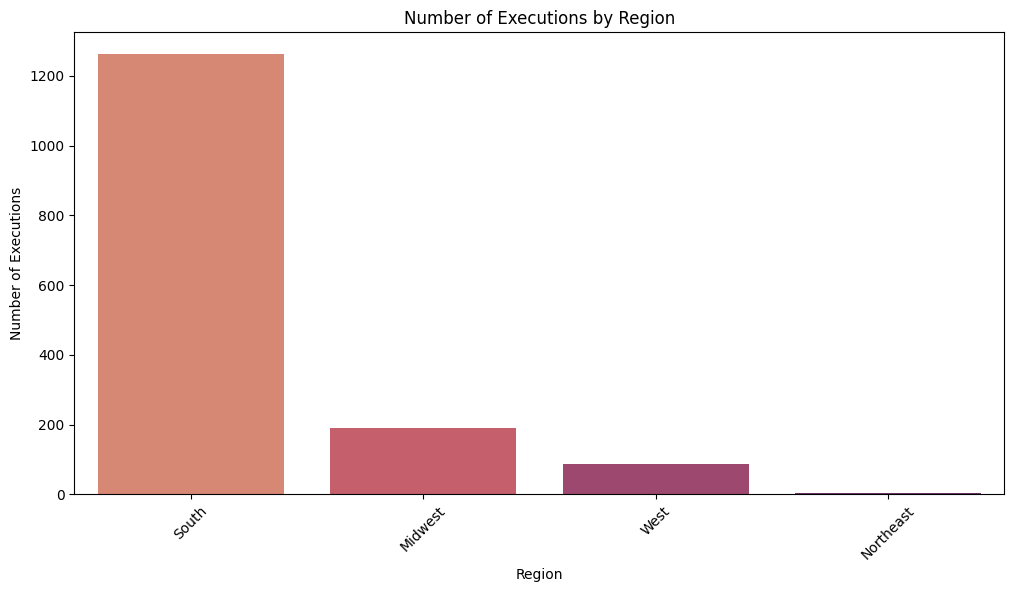

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(x=region_counts.index, y=region_counts.values,
            hue=region_counts.index, palette='flare')
plt.title('Number of Executions by Region')
plt.xlabel('Region')
plt.ylabel('Number of Executions')
plt.xticks(rotation=45)
plt.show()

In [25]:
region_counts

,count
Region,
South,1262
Midwest,191
West,88
Northeast,4


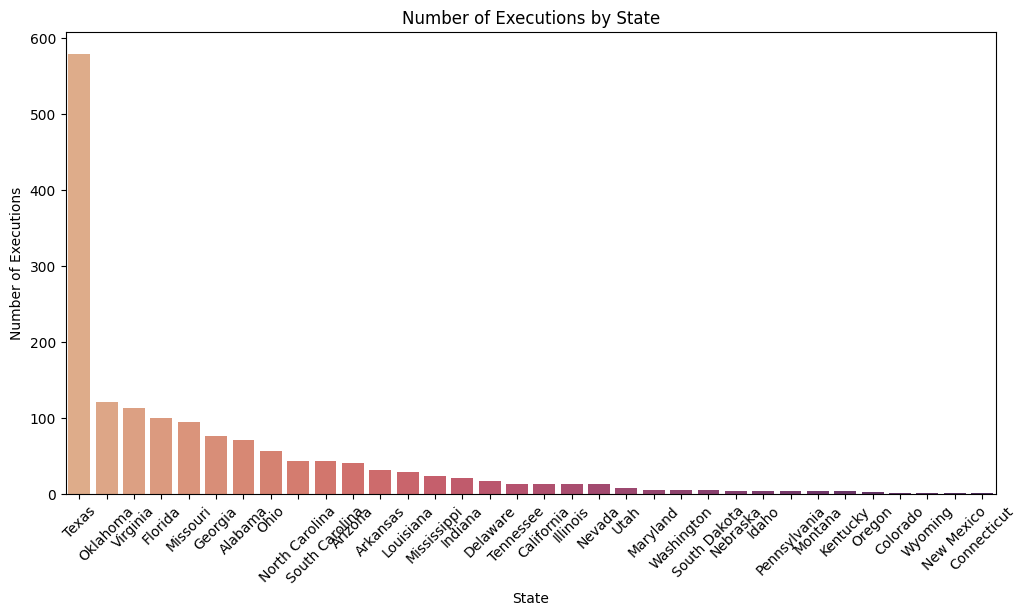

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts.index, y=state_counts.values,
            hue=state_counts.index, palette='flare')
plt.title('Number of Executions by State')
plt.xlabel('State')
plt.ylabel('Number of Executions')
plt.xticks(rotation=45)
plt.show()

In [27]:
state_counts

,count
State,
Texas,579
Oklahoma,120
Virginia,113
Florida,99
Missouri,94
Georgia,76
Alabama,70
Ohio,56
North Carolina,43


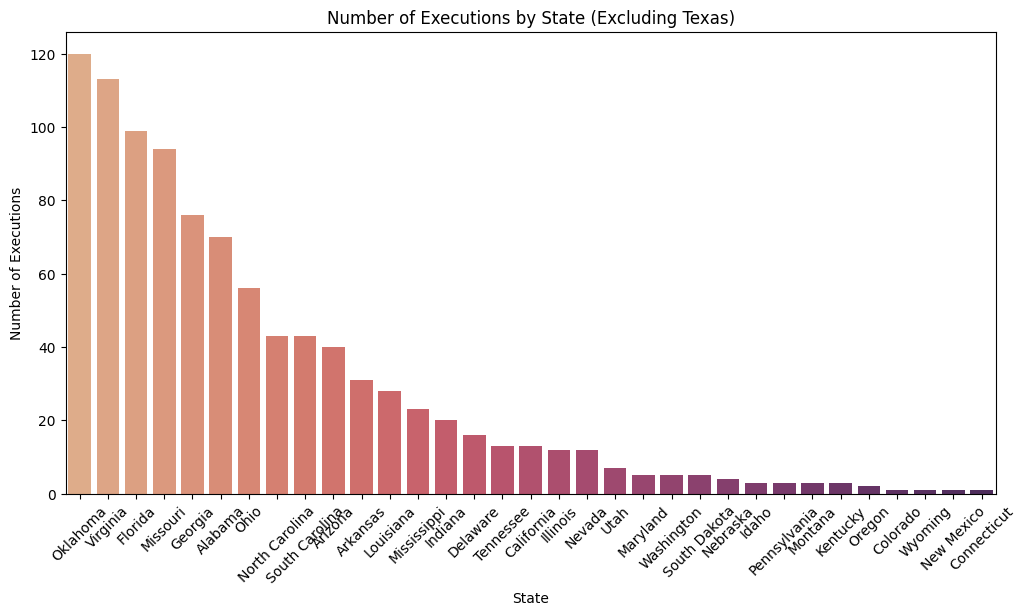

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts_texas_removed.index, y=state_counts_texas_removed.values,
            hue=state_counts_texas_removed.index, palette='flare')
plt.title('Number of Executions by State (Excluding Texas)')
plt.xlabel('State')
plt.ylabel('Number of Executions')
plt.xticks(rotation=45)
plt.show()

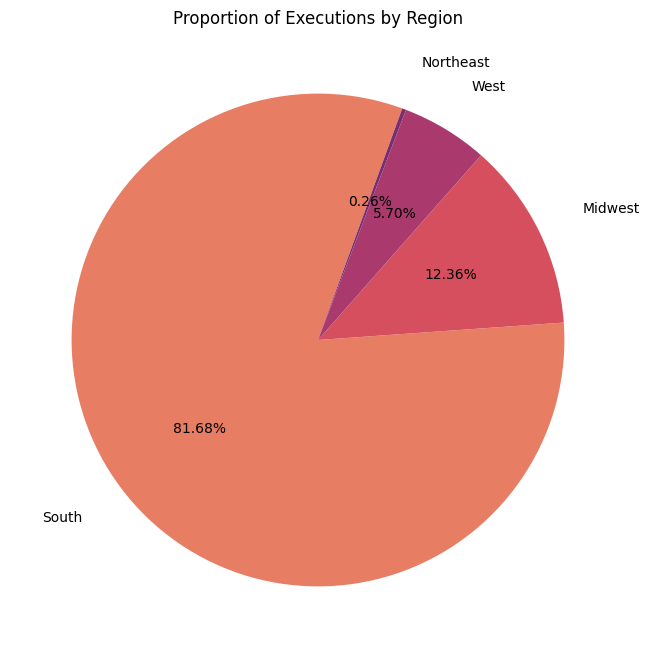

In [29]:
plt.figure(figsize=(8, 8))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.2f%%',
        startangle=70, colors=sns.color_palette('flare', len(region_counts)), labeldistance=1.2)
plt.title('Proportion of Executions by Region')
plt.show()

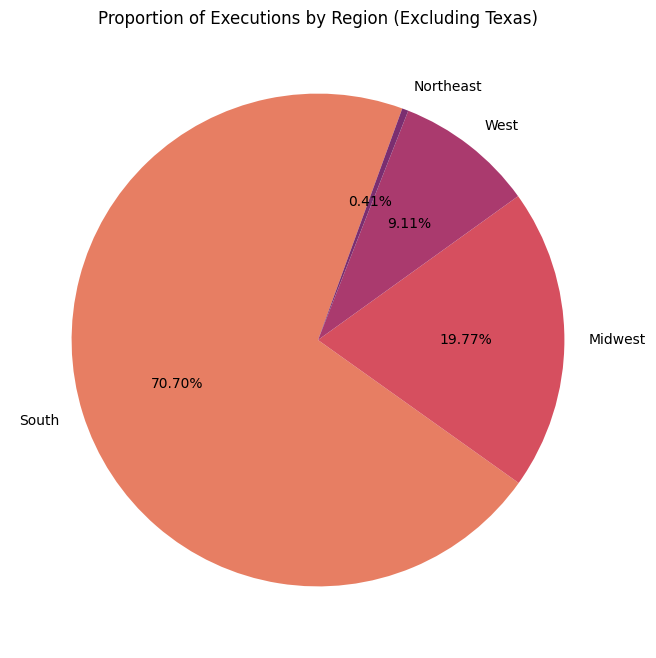

In [30]:
plt.figure(figsize=(8, 8))
plt.pie(region_counts_texas_removed, labels=region_counts_texas_removed.index, autopct='%1.2f%%',
        startangle=70, colors=sns.color_palette('flare', len(region_counts)))
plt.title('Proportion of Executions by Region (Excluding Texas)')
plt.show()

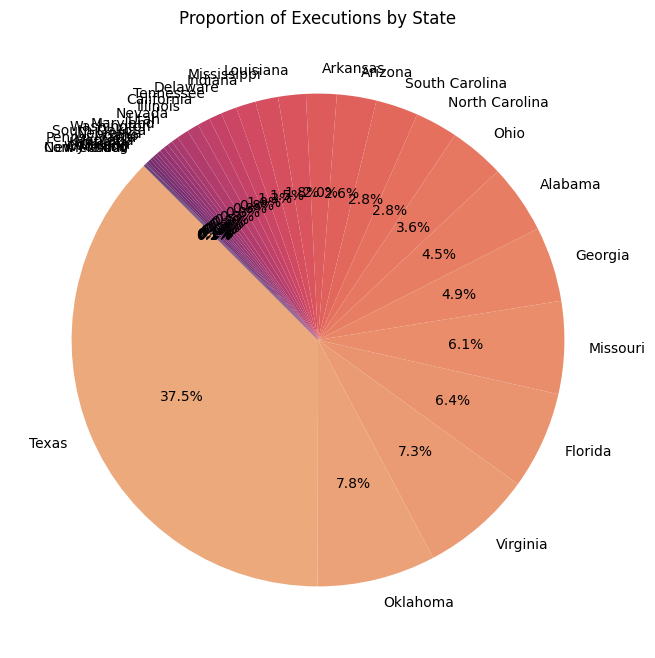

In [31]:
plt.figure(figsize=(8, 8))
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%',
        startangle=135, colors=sns.color_palette('flare', len(state_counts)))
plt.title('Proportion of Executions by State')
plt.show()

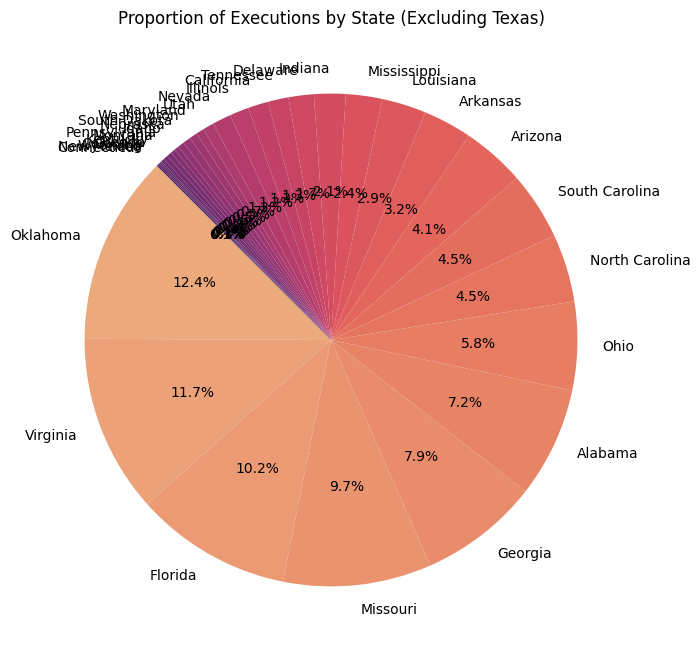

In [32]:
plt.figure(figsize=(8, 8))
plt.pie(state_counts_texas_removed, labels=state_counts_texas_removed.index, autopct='%1.1f%%',
        startangle=135, colors=sns.color_palette('flare', len(state_counts_texas_removed)))
plt.title('Proportion of Executions by State (Excluding Texas)')
plt.show()

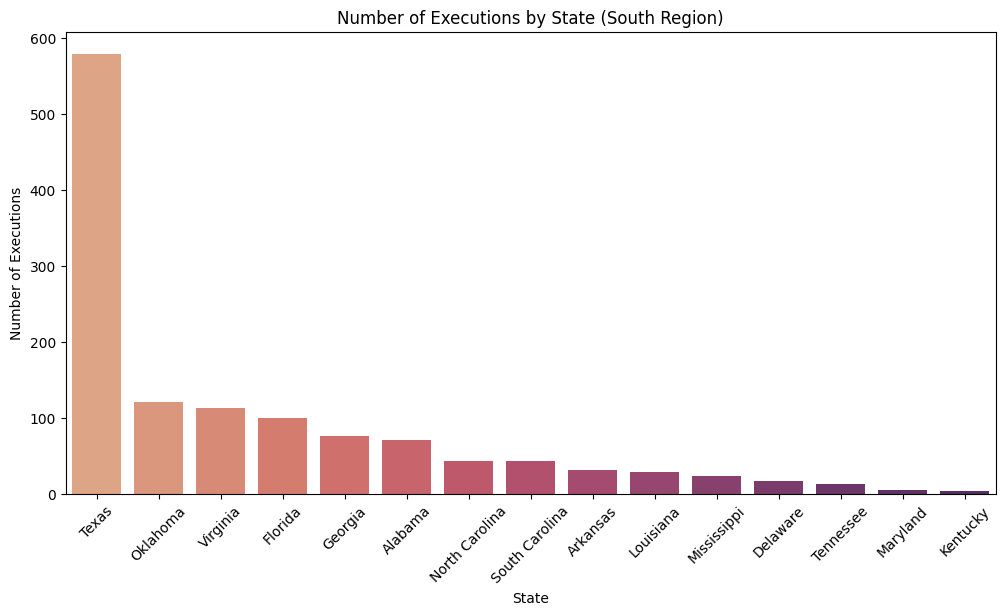

In [33]:
plt.figure(figsize=(12, 6))
sns.barplot(x=south_counts.index, y=south_counts.values,
            hue=south_counts.index, palette='flare')
plt.title('Number of Executions by State (South Region)')
plt.xlabel('State')
plt.ylabel('Number of Executions')
plt.xticks(rotation=45)
plt.show()

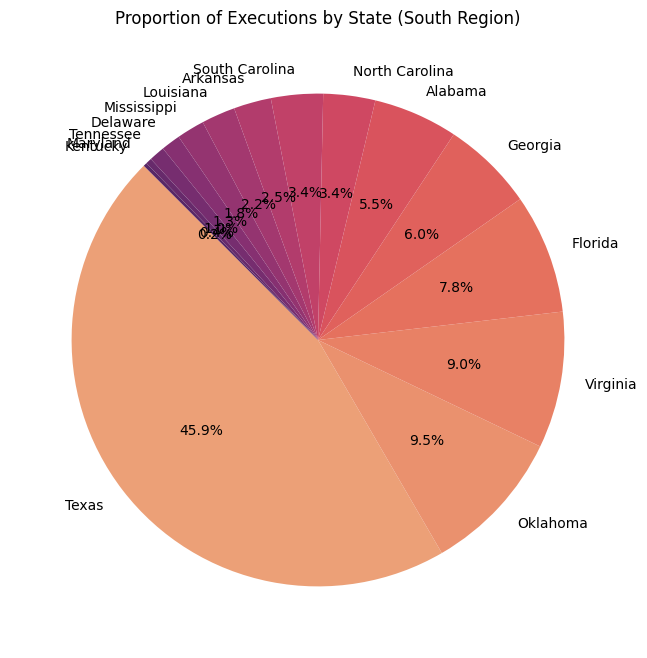

In [34]:
plt.figure(figsize=(8, 8))
plt.pie(south_counts, labels=south_counts.index, autopct='%1.1f%%',
        startangle=135, colors=sns.color_palette('flare', len(south_counts)))
plt.title('Proportion of Executions by State (South Region)')
plt.show()

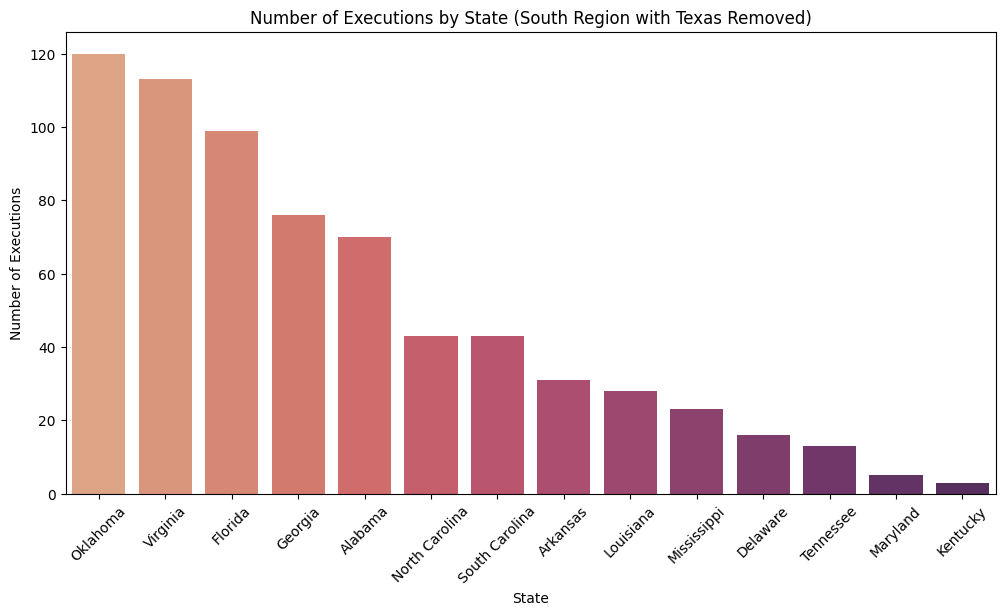

In [41]:
plt.figure(figsize=(12, 6))
sns.barplot(x=south_counts_texas_removed.index, y=south_counts_texas_removed.values,
            hue=south_counts_texas_removed.index, palette='flare')
plt.title('Number of Executions by State (South Region with Texas Removed)')
plt.xlabel('State')
plt.ylabel('Number of Executions')
plt.xticks(rotation=45)
plt.show()

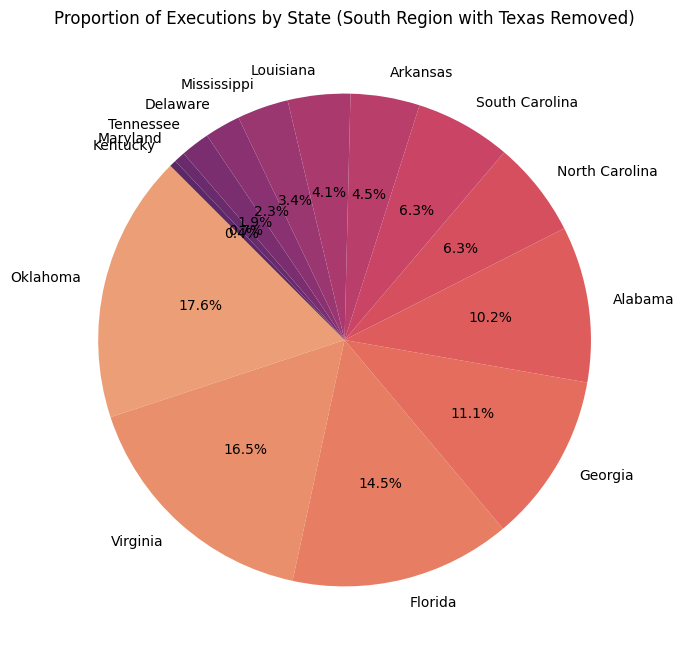

In [42]:
plt.figure(figsize=(8, 8))
plt.pie(south_counts_texas_removed, labels=south_counts_texas_removed.index, autopct='%1.1f%%',
        startangle=135, colors=sns.color_palette('flare', len(south_counts_texas_removed)))
plt.title('Proportion of Executions by State (South Region with Texas Removed)')
plt.show()

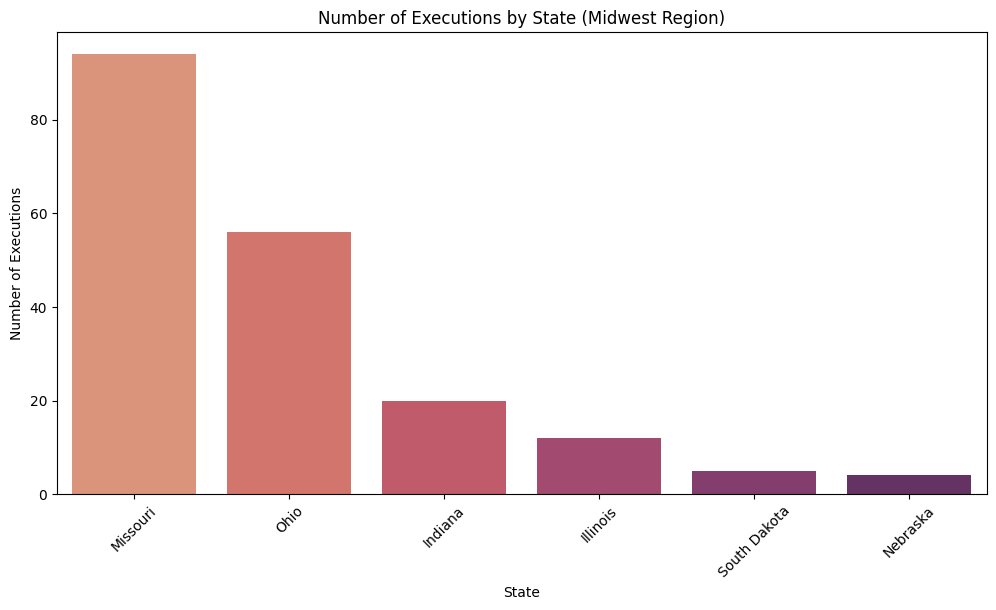

In [36]:
plt.figure(figsize=(12, 6))
sns.barplot(x=midwest_counts.index, y=midwest_counts.values,
            hue=midwest_counts.index, palette='flare')
plt.title('Number of Executions by State (Midwest Region)')
plt.xlabel('State')
plt.ylabel('Number of Executions')
plt.xticks(rotation=45)
plt.show()

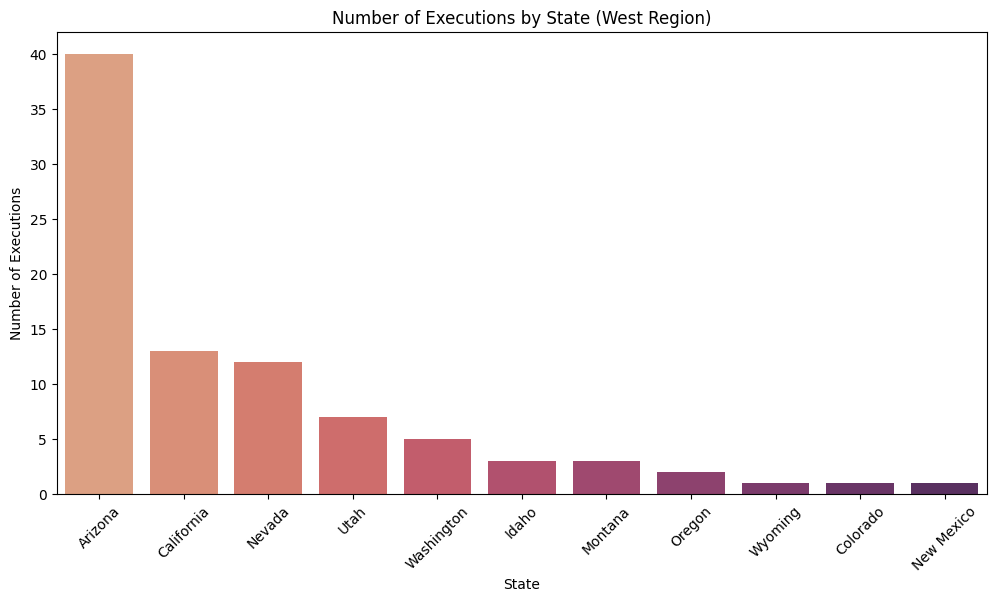

In [37]:
plt.figure(figsize=(12, 6))
sns.barplot(x=west_counts.index, y=west_counts.values,
            hue=west_counts.index, palette='flare')
plt.title('Number of Executions by State (West Region)')
plt.xlabel('State')
plt.ylabel('Number of Executions')
plt.xticks(rotation=45)
plt.show()

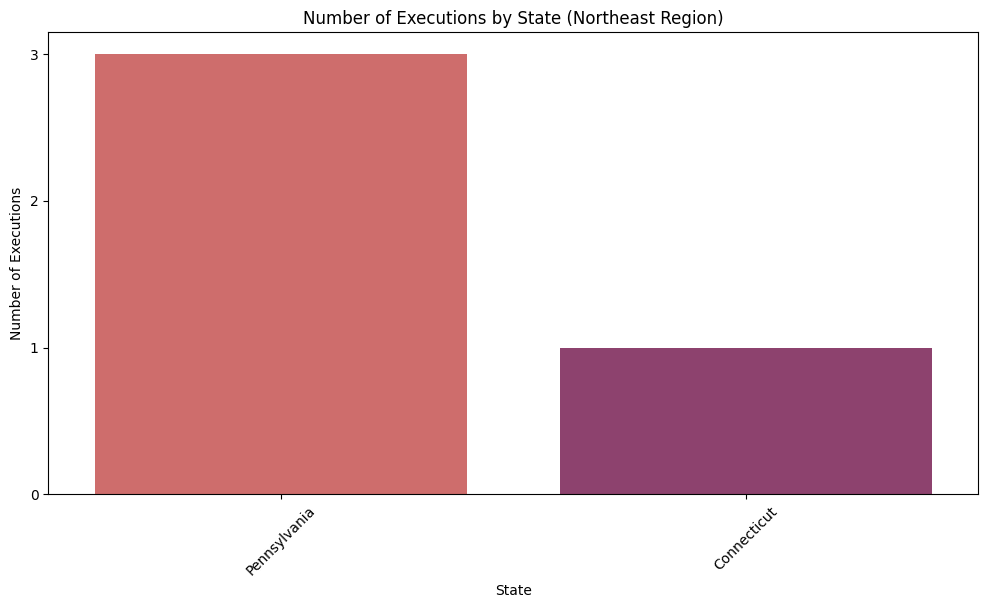

In [38]:
plt.figure(figsize=(12, 6))
sns.barplot(x=northeast_counts.index, y=northeast_counts.values,
            hue=northeast_counts.index, palette='flare')
plt.title('Number of Executions by State (Northeast Region)')
plt.xlabel('State')
plt.ylabel('Number of Executions')
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 4, 1))
plt.show()

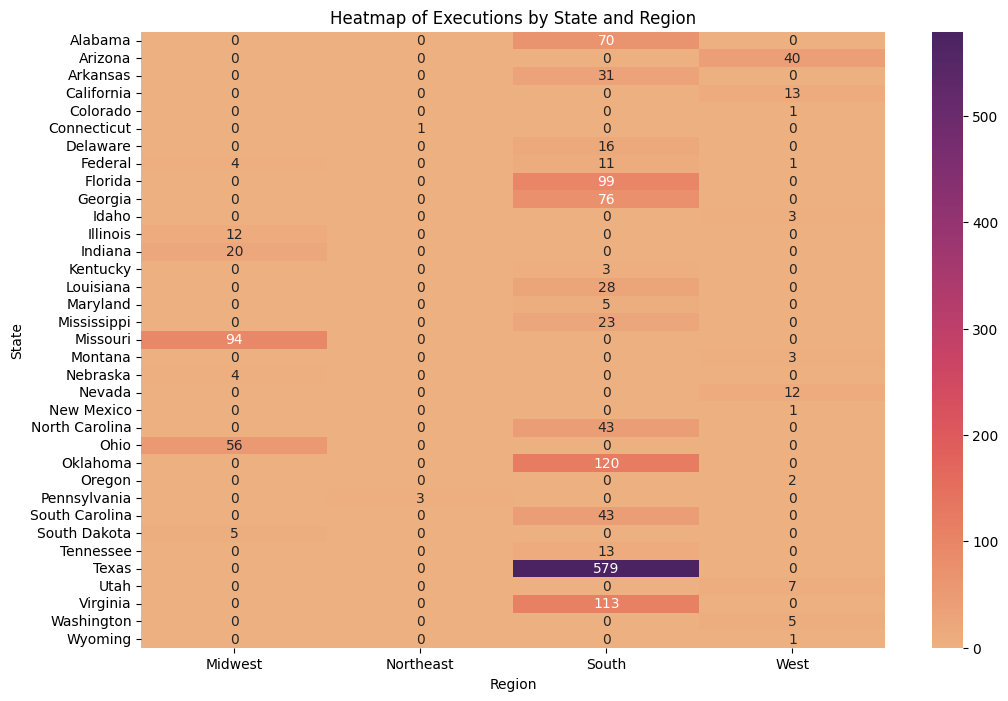

In [39]:
state_region_counts = pd.crosstab(df['State'], df['Region'])

plt.figure(figsize=(12, 8))
sns.heatmap(state_region_counts, cmap='flare', annot=True, fmt='d')
plt.title('Heatmap of Executions by State and Region')
plt.xlabel('Region')
plt.ylabel('State')
plt.show()

In [40]:
region_encoder = LabelEncoder()
state_encoder = LabelEncoder()

df['Region_encoded'] = region_encoder.fit_transform(df['Region'])
df['State_encoded'] = state_encoder.fit_transform(df['State'])

X = df[['Region_encoded']]
y = df['State_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=18, stratify=X)

logistic_model_ovr = OneVsRestClassifier(LogisticRegression(class_weight='balanced', random_state=18))
logistic_model_ovr.fit(X_train, y_train)

tree_model = DecisionTreeClassifier(class_weight='balanced', random_state=18)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=18)


Logistic Regression: One vs Rest - Evaluation Metrics:

Accuracy: 0.43
Precision: 0.78
Recall: 0.43
F1 Score: 0.29
ROC AUC Score: 0.51

Confusion Matrix:



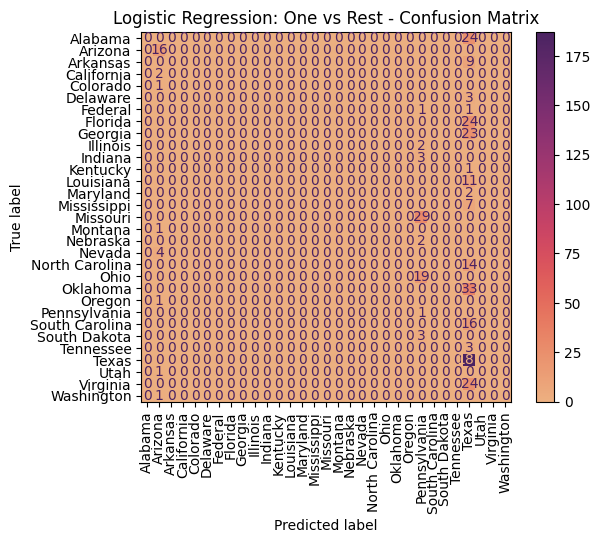


Predicted States: ['Arizona' 'Pennsylvania' 'Texas']

Actual States: ['Alabama' 'Arizona' 'Arkansas' 'California' 'Colorado' 'Delaware'
 'Federal' 'Florida' 'Georgia' 'Illinois' 'Indiana' 'Kentucky' 'Louisiana'
 'Maryland' 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada'
 'North Carolina' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Virginia'
 'Washington']




Decision Tree - Evaluation Metrics:

Accuracy: 0.47
Precision: 0.76
Recall: 0.47
F1 Score: 0.31
ROC AUC Score: 0.49

Confusion Matrix:



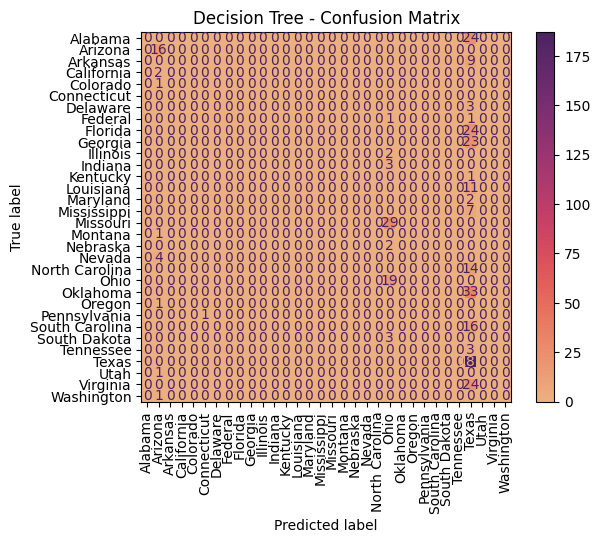


Predicted States: ['Arizona' 'Connecticut' 'Ohio' 'Texas']

Actual States: ['Alabama' 'Arizona' 'Arkansas' 'California' 'Colorado' 'Delaware'
 'Federal' 'Florida' 'Georgia' 'Illinois' 'Indiana' 'Kentucky' 'Louisiana'
 'Maryland' 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada'
 'North Carolina' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Virginia'
 'Washington']





In [21]:
y_pred_logistic_ovr = logistic_model_ovr.predict(X_test)
y_pred_tree = tree_model.predict(X_test)
y_pred_logistic_ovr_prob = logistic_model_ovr.predict_proba(X_test)
y_pred_tree_prob = tree_model.predict_proba(X_test)

def evaluate_model(y_true, y_pred, y_pred_prob, model, model_name="Model"):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_true, y_pred, average='weighted')

    model_classes = state_encoder.classes_
    y_true_decoded = state_encoder.inverse_transform(y_true)
    valid_indices = [i for i, cls in enumerate(model_classes) if cls in np.unique(y_true_decoded)]
    y_pred_prob_filtered = y_pred_prob[:, valid_indices]
    y_pred_prob_filtered = y_pred_prob_filtered / y_pred_prob_filtered.sum(axis=1, keepdims=True)
    roc_auc = roc_auc_score(y_true_decoded, y_pred_prob_filtered, multi_class='ovr', average='weighted')

    print(f"\n{model_name} - Evaluation Metrics:\n")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC AUC Score: {roc_auc:.2f}")
    print("\nConfusion Matrix:\n")

    cm = confusion_matrix(y_true, y_pred)
    unique_labels = np.unique(np.concatenate([y_true, y_pred]))
    display_labels = state_encoder.inverse_transform(unique_labels)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
    cm_display.plot(cmap='flare', xticks_rotation='vertical')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

    predicted_states = state_encoder.inverse_transform(y_pred)
    print(f"\nPredicted States: {np.unique(predicted_states)}")

    actual_states = state_encoder.inverse_transform(y_true)
    print(f"\nActual States: {np.unique(actual_states)}\n\n\n")

evaluate_model(y_test, y_pred_logistic_ovr, y_pred_logistic_ovr_prob, logistic_model_ovr, model_name="Logistic Regression: One vs Rest")
evaluate_model(y_test, y_pred_tree, y_pred_tree_prob, tree_model, model_name="Decision Tree")